<a href="https://colab.research.google.com/github/MaulidinZakaria/16_MaulidinZakaria/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


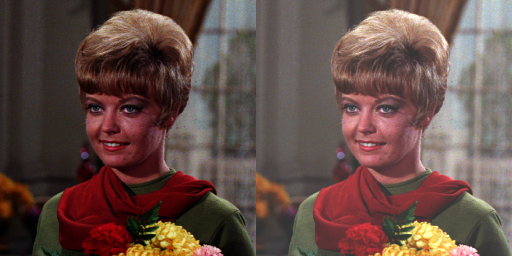

In [3]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
#brightness_image = cv.converScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# **Tugas Praktikum**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

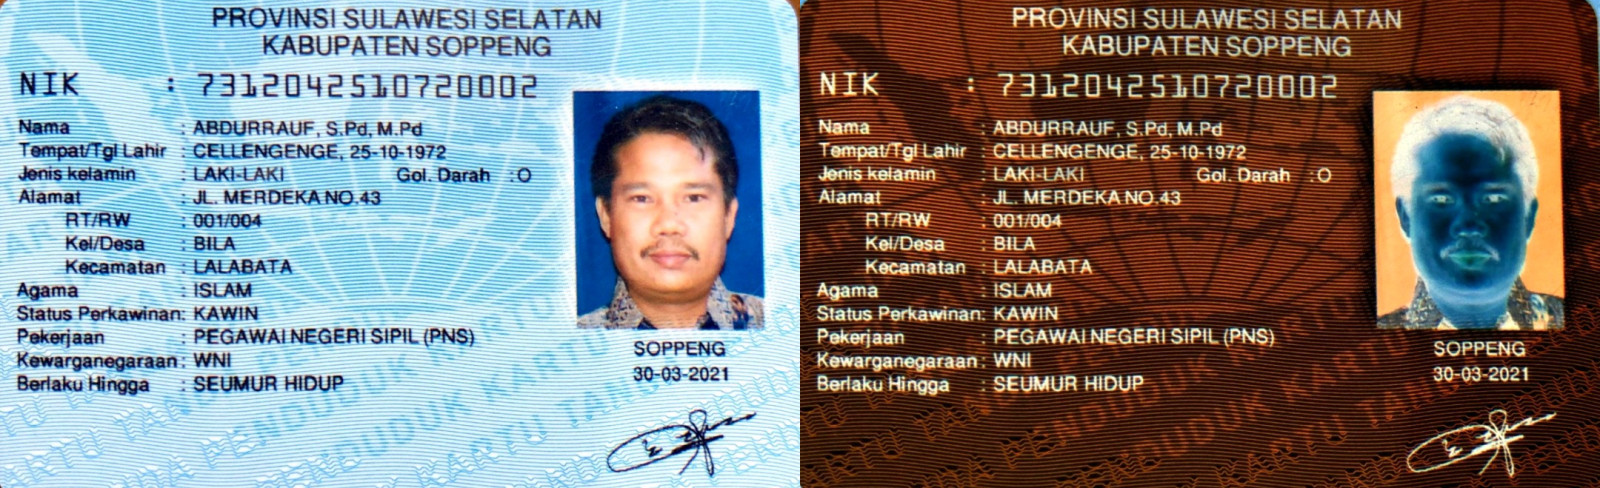

In [5]:
ktp = cv.imread('/content/KTP.jpeg.jpg')

inverse_image = 255 - ktp
final_frame = cv.hconcat((ktp, inverse_image))

cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


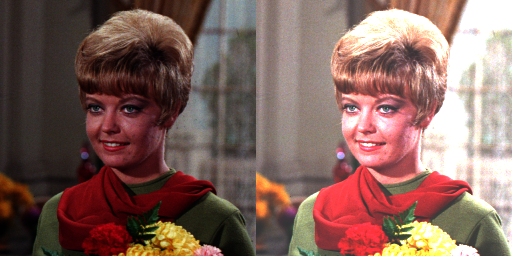

In [6]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')
try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
    contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')

# Melakukan transformasi kontras dan kecerahan
adjusted_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

final_frame = cv.hconcat((original, adjusted_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukkan nilai kecerahan: 20


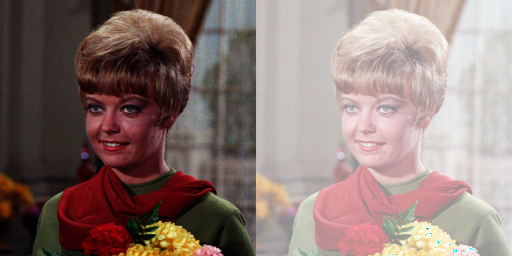

In [11]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')

def log_brightness_transform(image, brightness):
    # Menambah kecerahan ke setiap piksel
    brightened_image = image + brightness

    # Menghindari nilai piksel lebih dari 255 setelah penambahan kecerahan
    brightened_image = np.clip(brightened_image, 0, 255)

    # Menentukan konstanta c, berdasarkan nilai maksimal piksel
    c = 255 / np.log(1 + np.max(brightened_image))

    # Menerapkan transformasi log
    log_image = c * (np.log(1 + brightened_image))

    # Mengubah nilai piksel agar sesuai dengan rentang 0-255
    log_image = np.array(log_image, dtype=np.uint8)

    return log_image

# Terapkan transformasi log dengan input kecerahan
log_image_with_brightness = log_brightness_transform(original, brightness=brightness)

final_frame = cv.hconcat((original, log_image_with_brightness))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

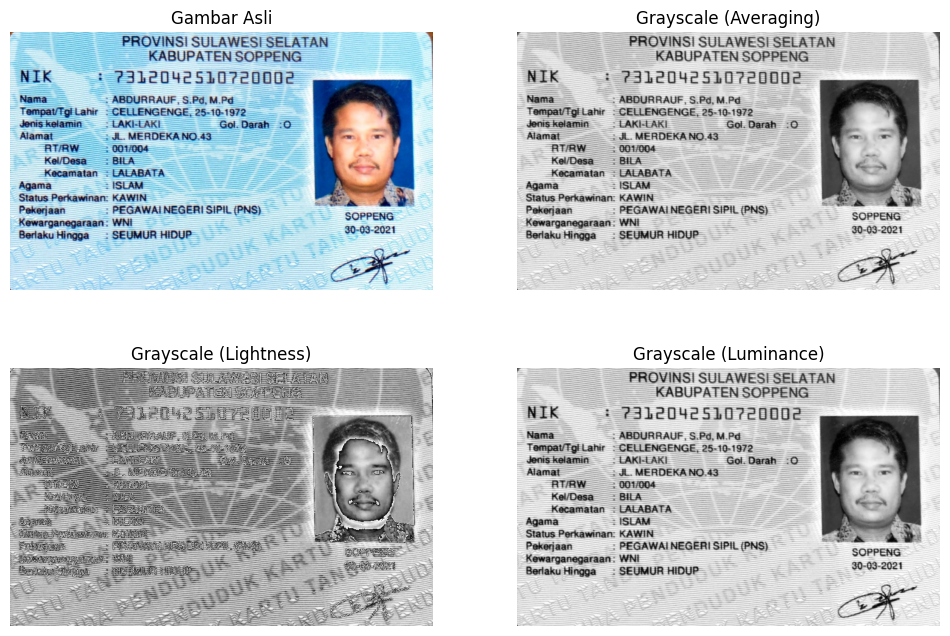

In [17]:
# Fungsi untuk Grayscale metode Averaging
def grayscale_averaging(img):
    return np.mean(img, axis=2).astype(np.uint8)

# Fungsi untuk Grayscale metode Lightness
def grayscale_lightness(img):
    return ((np.max(img, axis=2) + np.min(img, axis=2)) / 2).astype(np.uint8)

# Fungsi untuk Grayscale metode Luminance
def grayscale_luminance(img):
    return (0.21 * img[:, :, 0] + 0.72 * img[:, :, 1] + 0.07 * img[:, :, 2]).astype(np.uint8)

# Membaca gambar
ktp = cv.imread('/content/KTP.jpeg.jpg')

# Mengubah gambar menjadi RGB
ktp_rgb = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)

# Grayscale dengan metode Averaging
gray_averaging = grayscale_averaging(ktp_rgb)

# Grayscale dengan metode Lightness
gray_lightness = grayscale_lightness(ktp_rgb)

# Grayscale dengan metode Luminance
gray_luminance = grayscale_luminance(ktp_rgb)

# Menampilkan gambar asli dan hasil grayscale
plt.figure(figsize=(12, 8))

# Gambar asli
plt.subplot(2, 2, 1)
plt.imshow(ktp_rgb)
plt.title("Gambar Asli")
plt.axis('off')

# Grayscale Averaging
plt.subplot(2, 2, 2)
plt.imshow(gray_averaging, cmap='gray')
plt.title("Grayscale (Averaging)")
plt.axis('off')

# Grayscale Lightness
plt.subplot(2, 2, 3)
plt.imshow(gray_lightness, cmap='gray')
plt.title("Grayscale (Lightness)")
plt.axis('off')

# Grayscale Luminance
plt.subplot(2, 2, 4)
plt.imshow(gray_luminance, cmap='gray')
plt.title("Grayscale (Luminance)")
plt.axis('off')

plt.show()


5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

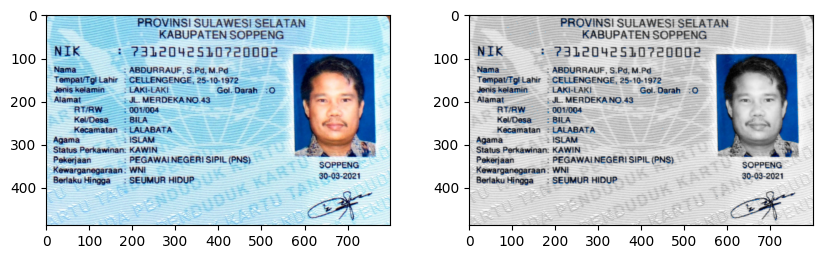

In [18]:
image = cv.imread('/content/KTP.jpeg.jpg')

# Convert image to RGB (for matplotlib display)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Convert image to HSV color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Define the range for the color blue in HSV
lower_blue = np.array([100, 150, 50])
upper_blue = np.array([140, 255, 255])

# Create a mask to isolate blue color
blue_mask = cv.inRange(hsv_image, lower_blue, upper_blue)

# Extract the blue regions from the original image
blue_only = cv.bitwise_and(image_rgb, image_rgb, mask=blue_mask)

# Convert the original image to grayscale
gray_image = cv.cvtColor(image_rgb, cv.COLOR_RGB2GRAY)

# Convert grayscale image back to 3 channels so we can combine with blue-only image
gray_image_3channel = cv.cvtColor(gray_image, cv.COLOR_GRAY2RGB)

# Use the inverse of the blue mask to keep non-blue regions as grayscale
mask_inverse = cv.bitwise_not(blue_mask)
gray_background = cv.bitwise_and(gray_image_3channel, gray_image_3channel, mask=mask_inverse)

# Combine the blue regions with the grayscale background
final_image = cv.add(blue_only, gray_background)

# Display the result
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
# plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(final_image)
# plt.axis('off')

plt.show()